In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

<AxesSubplot: title={'center': 'Normalized Boxplot for each Element'}, xlabel='Normalized Values'>

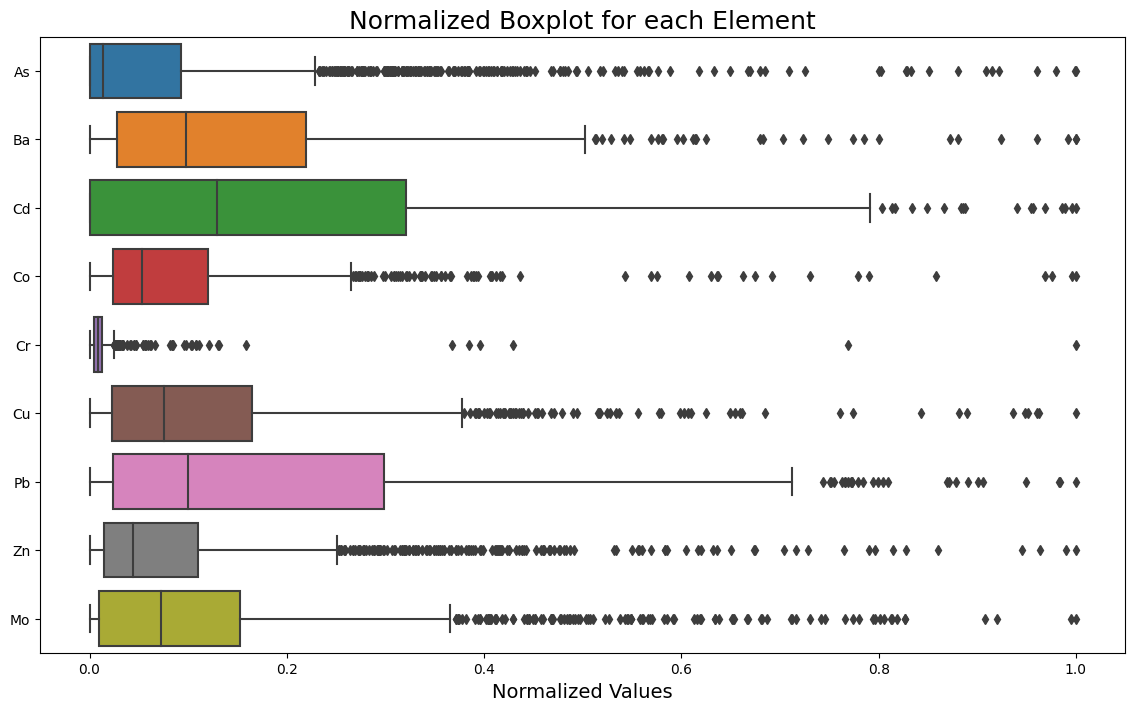

In [2]:
data = pd.read_csv('K:/Google Drive/DOUTORADO/Tese 2.0/Chapter I/KELLOGs/dataset.csv')

columns_to_plot = ['As', 'Ba', 'Cd', 'Co', 'Cr', 'Cu', 'Pb', 'Zn', 'Mo']

for col in columns_to_plot:
    data = data.sort_values(by=col,ascending=False)
    data = data[5:]

data_plot = data.copy()

scaler = MinMaxScaler(feature_range=(0, 1))
data_plot[columns_to_plot] = scaler.fit_transform(data_plot[columns_to_plot])

ax = sns.boxplot(data=data_plot[columns_to_plot], orient='h')
ax.figure.set_size_inches(14, 8)
ax.set_title('Normalized Boxplot for each Element', fontsize=18)
ax.set_xlabel('Normalized Values', fontsize=14)

ax

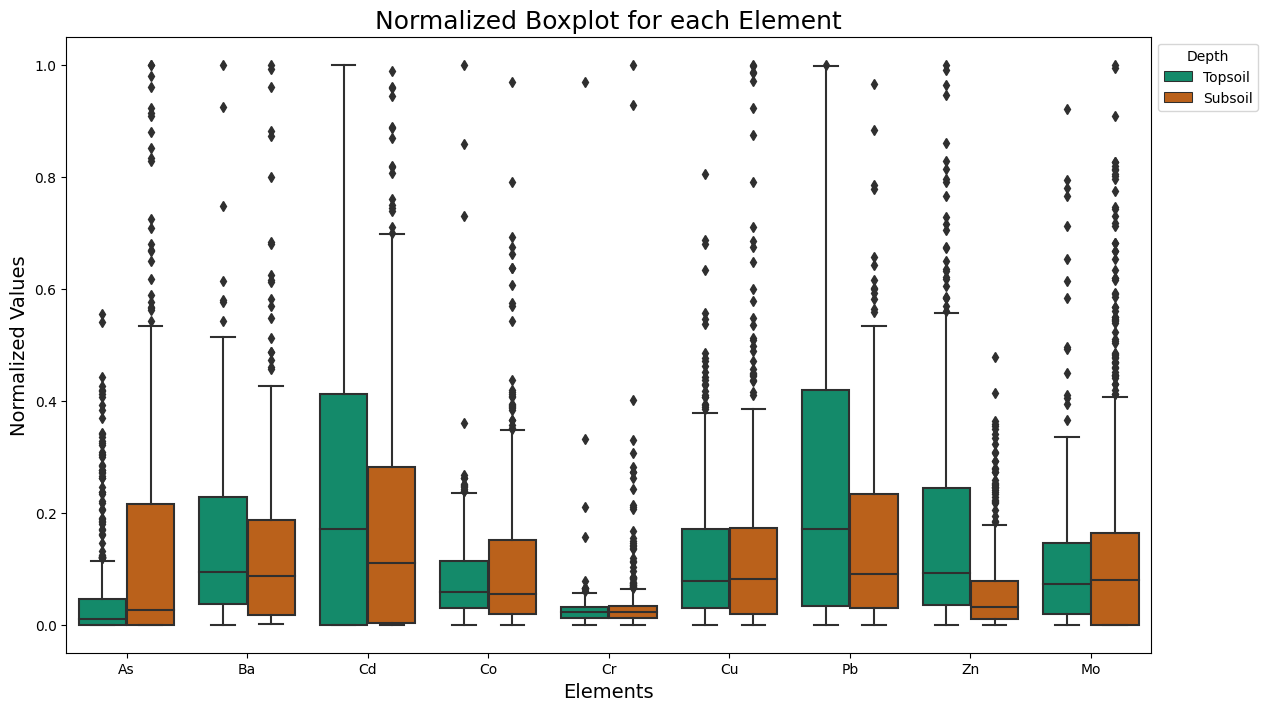

In [3]:
data = pd.read_csv('K:/Google Drive/DOUTORADO/Tese 2.0/Chapter I/KELLOGs/dataset.csv')
subsoil = pd.read_csv('subsoil.csv', header=None)
topsoil = pd.read_csv('topsoil.csv', header=None)

data['depth'] = 'None'
data.loc[data['id.layer_uuid_c'].isin(subsoil[0]), 'depth'] = 'Subsoil'
data.loc[data['id.layer_uuid_c'].isin(topsoil[0]), 'depth'] = 'Topsoil'
data = data[data['depth'] != 'None']

for col in columns_to_plot:
    data = data.sort_values(by=col,ascending=False)
    data = data[5:]

data_plot = data.copy()

scaler = MinMaxScaler(feature_range=(0, 1))
data_plot[columns_to_plot] = scaler.fit_transform(data_plot[columns_to_plot])

data_melted = pd.melt(data_plot, id_vars=['depth'], value_vars=columns_to_plot, var_name='Variable', value_name='Value')

plt.figure(figsize=(14, 8))
ax = sns.boxplot(data=data_melted, 
                x='Variable', 
                y='Value', 
                hue='depth', 
                orient='v', 
                palette = ["#009E73", "#D55E00"],
                hue_order=['Topsoil','Subsoil'])
ax.set_title('Normalized Boxplot for each Element', fontsize=18)
ax.set_ylabel('Normalized Values', fontsize=14)
ax.set_xlabel('Elements', fontsize=14)
plt.legend(title='Depth', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [4]:
data = pd.read_csv('K:/Google Drive/DOUTORADO/Tese 2.0/Chapter I/KELLOGs/dataset.csv')
subsoil = pd.read_csv('subsoil.csv', header=None)
topsoil = pd.read_csv('topsoil.csv', header=None)

data['depth'] = 'None'
data.loc[data['id.layer_uuid_c'].isin(subsoil[0]), 'depth'] = 'subsoil'
data.loc[data['id.layer_uuid_c'].isin(topsoil[0]), 'depth'] = 'topsoil'
#data = data[data['depth'] != 'None']

for col in columns_to_plot:
    data = data.sort_values(by=col,ascending=False)
    data = data[5:]

data.shape

(1292, 1712)

In [5]:
descriptive = pd.DataFrame(data[columns_to_plot].describe())
descriptive

,As,Ba,Cd,Co,Cr,Cu,Pb,Zn,Mo
count,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000
mean,0.816906,67.115060,0.159337,0.824311,0.193588,2.153765,1.422154,1.863430,0.140872
std,1.456187,69.994743,0.174504,1.015552,0.617333,2.531978,1.553176,2.662706,0.183083
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,13.118448,0.000000,0.215346,0.072013,0.405311,0.187041,0.272814,0.010488
50%,0.128061,46.468620,0.099465,0.476510,0.130171,1.362165,0.801558,0.831455,0.083407
75%,0.846109,104.163841,0.246811,1.076516,0.185866,2.979015,2.394480,2.065326,0.174127
max,9.158415,473.588566,0.768254,8.928518,14.443822,18.085914,8.011357,18.822067,1.144700


In [6]:
columns = descriptive.index.tolist()
descriptive = descriptive.T.reset_index()
descriptive.columns = ['Elements'] + columns

descriptive

,Elements,count,mean,std,min,25%,50%,75%,max
0,As,1292.0,0.816906,1.456187,0.0,0.000000,0.128061,0.846109,9.158415
1,Ba,1292.0,67.115060,69.994743,0.0,13.118448,46.468620,104.163841,473.588566
2,Cd,1292.0,0.159337,0.174504,0.0,0.000000,0.099465,0.246811,0.768254
3,Co,1292.0,0.824311,1.015552,0.0,0.215346,0.476510,1.076516,8.928518
4,Cr,1292.0,0.193588,0.617333,0.0,0.072013,0.130171,0.185866,14.443822
5,Cu,1292.0,2.153765,2.531978,0.0,0.405311,1.362165,2.979015,18.085914
6,Pb,1292.0,1.422154,1.553176,0.0,0.187041,0.801558,2.394480,8.011357
7,Zn,1292.0,1.863430,2.662706,0.0,0.272814,0.831455,2.065326,18.822067
8,Mo,1292.0,0.140872,0.183083,0.0,0.010488,0.083407,0.174127,1.144700


In [7]:
descriptive.drop(columns=['count','25%','75%'], inplace=True)

descriptive.columns = ['Elements', 'Mean', 'Standard Deviation', 'Minimum', 'Median', 'Maximum']

descriptive

,Elements,Mean,Standard Deviation,Minimum,Median,Maximum
0,As,0.816906,1.456187,0.0,0.128061,9.158415
1,Ba,67.115060,69.994743,0.0,46.468620,473.588566
2,Cd,0.159337,0.174504,0.0,0.099465,0.768254
3,Co,0.824311,1.015552,0.0,0.476510,8.928518
4,Cr,0.193588,0.617333,0.0,0.130171,14.443822
5,Cu,2.153765,2.531978,0.0,1.362165,18.085914
6,Pb,1.422154,1.553176,0.0,0.801558,8.011357
7,Zn,1.863430,2.662706,0.0,0.831455,18.822067
8,Mo,0.140872,0.183083,0.0,0.083407,1.144700


In [8]:
descriptive = descriptive[['Elements', 'Minimum', 'Median', 'Mean', 'Maximum', 'Standard Deviation']]

descriptive

,Elements,Minimum,Median,Mean,Maximum,Standard Deviation
0,As,0.0,0.128061,0.816906,9.158415,1.456187
1,Ba,0.0,46.468620,67.115060,473.588566,69.994743
2,Cd,0.0,0.099465,0.159337,0.768254,0.174504
3,Co,0.0,0.476510,0.824311,8.928518,1.015552
4,Cr,0.0,0.130171,0.193588,14.443822,0.617333
5,Cu,0.0,1.362165,2.153765,18.085914,2.531978
6,Pb,0.0,0.801558,1.422154,8.011357,1.553176
7,Zn,0.0,0.831455,1.863430,18.822067,2.662706
8,Mo,0.0,0.083407,0.140872,1.144700,0.183083


In [9]:
#descriptive.to_csv('descriptive_analysis.csv')

In [10]:
spectra = data[['id.layer_uuid_c'] + list(data.columns[10:-1])]

In [11]:
wavelenghts = list(range(600,4002,2))

spectra.columns = ['id'] + wavelenghts

In [12]:
topsoil.columns[10:-1]

Int64Index([], dtype='int64')

In [13]:
data.depth.value_counts()

subsoil    567
topsoil    503
None       222
Name: depth, dtype: int64

In [14]:
total_spectra = spectra[1:].mean()
topsoil_spectra = data[data['depth'] == 'topsoil']
topsoil_spectra = topsoil_spectra[['id.layer_uuid_c'] + list(topsoil_spectra.columns[10:-1])]
topsoil_spectra.columns = ['id'] + wavelenghts
topsoil_spectra = topsoil_spectra[1:].mean()
subsoil_spectra = data[data['depth'] == 'subsoil']
subsoil_spectra = subsoil_spectra[['id.layer_uuid_c'] + list(subsoil_spectra.columns[10:-1])]
subsoil_spectra.columns = ['id'] + wavelenghts
subsoil_spectra = subsoil_spectra[1:].mean()

C:\Users\Angelo\AppData\Local\Temp\ipykernel_19084\1856891342.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  total_spectra = spectra[1:].mean()
C:\Users\Angelo\AppData\Local\Temp\ipykernel_19084\1856891342.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  topsoil_spectra = topsoil_spectra[1:].mean()
C:\Users\Angelo\AppData\Local\Temp\ipykernel_19084\1856891342.py:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeri

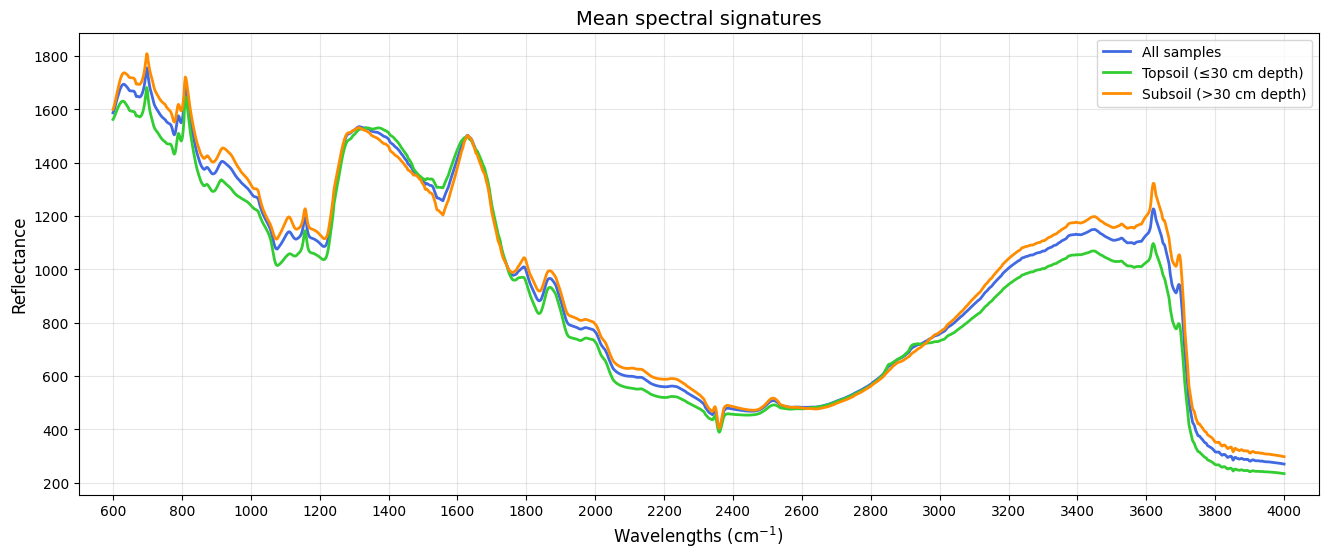

In [15]:
plt.figure(figsize=(16,6))

plt.plot(total_spectra, label='All samples', linewidth=2, color='royalblue')
plt.plot(topsoil_spectra, label='Topsoil (≤30 cm depth)', linewidth=2, color='limegreen')
plt.plot(subsoil_spectra, label='Subsoil (>30 cm depth)', linewidth=2, color='darkorange')

plt.xlabel('Wavelengths (cm$^{-1}$)', fontsize=12)
plt.ylabel('Reflectance', fontsize=12)
plt.title('Mean spectral signatures', fontsize=14)
plt.xlim(500,4100)

plt.legend()

plt.rcParams['axes.linewidth'] = 1.2
x_ticks = range(600, 4199, 200)
plt.xticks(x_ticks)
plt.grid(True, linestyle='-', alpha=0.3)

plt.show()

C:\Users\Angelo\AppData\Local\Temp\ipykernel_19084\2339126177.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spectra.iloc[:, 1:] = spectra.iloc[:, 1:].astype(float)


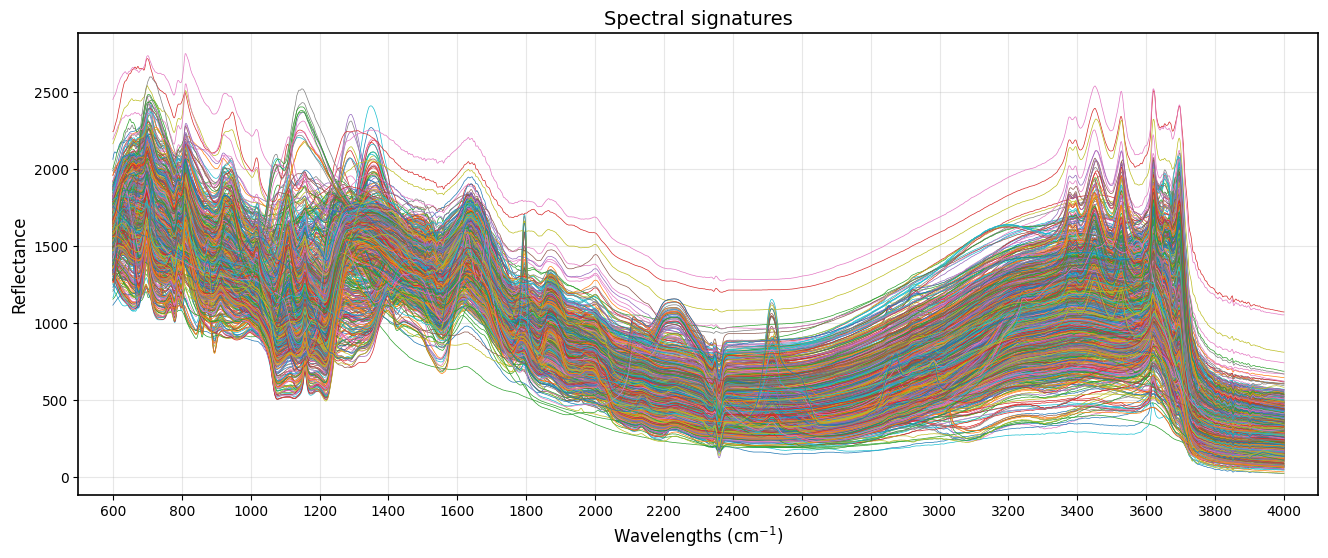

In [29]:
spectra.iloc[:, 1:] = spectra.iloc[:, 1:].astype(float)

plt.figure(figsize=(16,6))

for index, row in spectra.iloc[:,1:].iterrows():
    plt.plot(row, linewidth=0.5)

plt.xlabel('Wavelengths (cm$^{-1}$)', fontsize=12)
plt.ylabel('Reflectance', fontsize=12)
plt.title('Spectral signatures', fontsize=14)
plt.xlim(500,4100)

plt.rcParams['axes.linewidth'] = 1.2
x_ticks = range(600, 4199, 200)
plt.xticks(x_ticks)
plt.grid(True, linestyle='-', alpha=0.3)

plt.show()